In [1]:
!pip install -q gdown


In [2]:
!gdown --id 1TT-Z1Y9ZLUheDwla31PvLlKeLDT8rJqT --output ArsenicSkinImageBD.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1TT-Z1Y9ZLUheDwla31PvLlKeLDT8rJqT
From (redirected): https://drive.google.com/uc?id=1TT-Z1Y9ZLUheDwla31PvLlKeLDT8rJqT&confirm=t&uuid=c553871e-9571-4023-bc57-ca3e057aa1d8
To: /content/ArsenicSkinImageBD.zip
100% 3.54G/3.54G [00:49<00:00, 71.0MB/s]


In [3]:
!ls

ArsenicSkinImageBD.zip	sample_data


In [4]:
#extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/ArsenicSkinImageBD.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

ArsenicSkinImageBD  ArsenicSkinImageBD.zip  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
infected_files = os.listdir('/content/ArsenicSkinImageBD/Augmented/infected')
print(infected_files[0:5])
print(infected_files[-5:])

['IMG_1187_augmented_6.png', 'IMG_1525_augmented_5.png', 'IMG_1851_augmented_5.png', 'IMG_1389_augmented_2.png', 'IMG_1302_augmented_2.png']
['IMG_1475_augmented_4.png', 'IMG_1870_augmented_6.png', 'IMG_1647_augmented_6.png', 'IMG_1272_augmented_5.png', 'IMG_1906_augmented_5.png']


In [8]:
not_infected_files = os.listdir('/content/ArsenicSkinImageBD/Augmented/not_infected')
print(not_infected_files[0:5])
print(not_infected_files[-5:])

['IMG_3352_augmented_5.png', 'IMG20230610181220_augmented_3.png', 'IMG20230610182520_augmented_2.png', 'IMG20230610180946_augmented_4.png', 'IMG_3261_augmented_1.png']
['IMG20230610175446_augmented_5.png', 'IMG20230807183520_augmented_4.png', 'IMG20230610180249_augmented_4.png', 'IMG_3286_augmented_5.png', 'IMG_2059_augmented_2.png']


In [9]:
print('Number of with infected images: ',len(infected_files))
print('Number of without infected images: ',len(not_infected_files))


Number of with infected images:  4446
Number of without infected images:  4446


Create Labels for the two classes

With infected --> 1

Without infected --> 0

In [10]:
#create the labels

infected_labels = [1]*len(infected_files)
not_infected_labels = [0]*len(not_infected_files)

In [11]:
print(len(infected_labels))

print(len(not_infected_labels))

4446
4446


In [12]:
print(infected_labels[0:5])

print(not_infected_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
#combine with and without infected lebels in one list

labels = infected_labels + not_infected_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

8892
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


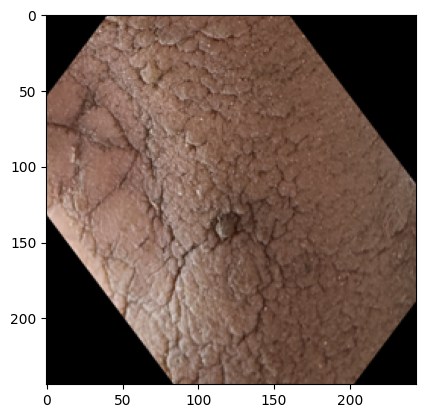

In [14]:
#display with infected image
img = mping.imread('/content/ArsenicSkinImageBD/Augmented/infected/IMG_1187_augmented_6.png')
implot = plt.imshow(img)
plt.show()

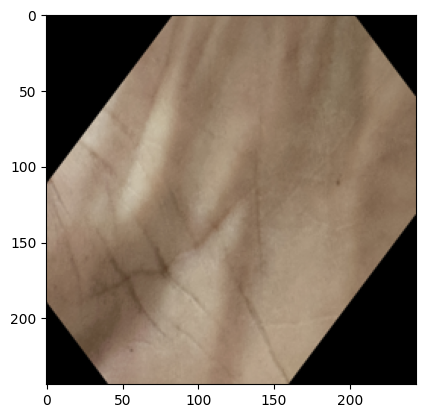

In [15]:
#display without infected image
img = mping.imread('/content/ArsenicSkinImageBD/Augmented/not_infected/IMG_3352_augmented_5.png')
implot = plt.imshow(img)
plt.show()

Image Pricesssing

Resize images

Convert the images into numpy arrrays

In [16]:
#convert image into numpay array

#with infected images
infected_path = '/content/ArsenicSkinImageBD/Augmented/infected/'

data = []

for img_file in infected_files:

  image = Image.open(infected_path + img_file)
  #resize image as 128*128
  image = image.resize((128,128))
  #convert image into RGB color
  image = image.convert('RGB')
  #cinvert into numpy array
  image = np.array(image)
  data.append(image)



#without infected mask images

not_infected_path = '/content/ArsenicSkinImageBD/Augmented/not_infected/'

for img_file in not_infected_files:

  image = Image.open(not_infected_path + img_file)
  #resize image as 128*128
  image = image.resize((128,128))
  #convert image into RGB color
  image = image.convert('RGB')
  #cinvert into numpy array
  image = np.array(image)
  data.append(image)


In [17]:
type(data)

list

In [18]:
type(data[0])

numpy.ndarray

In [19]:
len(data)

8892

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
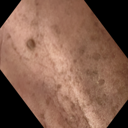

In [20]:
data[6]

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
#converting image list and label into numpy array

x = np.array(data)
y = np.array(labels)

In [23]:
type(x)

numpy.ndarray

In [24]:
type(y)

numpy.ndarray

In [25]:
print(x.shape)
print(y.shape )

(8892, 128, 128, 3)
(8892,)


Train Test Split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [27]:
#scalling data

x_train_scaled = x_train / 255

x_test_scaled = x_test / 255

In [28]:
x_train_scaled[0]

array([[[0.91764706, 0.73333333, 0.63137255],
        [0.90588235, 0.7254902 , 0.62745098],
        [0.87843137, 0.68627451, 0.58039216],
        ...,
        [0.84705882, 0.65490196, 0.56470588],
        [0.81960784, 0.61176471, 0.50588235],
        [0.81176471, 0.60392157, 0.50196078]],

       [[0.89019608, 0.69803922, 0.58823529],
        [0.88627451, 0.69803922, 0.58823529],
        [0.87843137, 0.68627451, 0.57647059],
        ...,
        [0.87058824, 0.67058824, 0.58039216],
        [0.80392157, 0.59607843, 0.50980392],
        [0.82352941, 0.60784314, 0.51372549]],

       [[0.89411765, 0.70196078, 0.59215686],
        [0.87843137, 0.68235294, 0.56862745],
        [0.87058824, 0.67843137, 0.56470588],
        ...,
        [0.8745098 , 0.6745098 , 0.58039216],
        [0.8627451 , 0.6627451 , 0.56862745],
        [0.83137255, 0.61960784, 0.52941176]],

       ...,

       [[0.6627451 , 0.49411765, 0.4       ],
        [0.68235294, 0.51372549, 0.41960784],
        [0.70980392, 0

Building Convolutional Neural Network (CNN)

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
num_of_classes = 2

model = keras.Sequential()

#first Convolutional layer
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


#second Convolutional layer
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#flatten Layer. its conver as vector
model.add(keras.layers.Flatten())

#first dense layer
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

#second dense layer
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

#third dense layer
#model.add(keras.layers.Dense(32, activation='relu'))
#model.add(keras.layers.Dropout(0.5))

#output layer
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
#compile the neural network

# model.compile(
#     optimizer = 'adam',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['acc']
# )

In [32]:
#training the neural network

# history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Model Evaluation


In [33]:
#test accuracy

# loss, accuracy = model.evaluate(x_test_scaled, y_test)
# print('Test Accuracy = ', accuracy)


In [34]:
# h = history

# #plot the loss value
# plt.plot(h.history['loss'], label='train loss')
# plt.plot(h.history['val_loss'], label='validation loss')
# plt.legend()
# plt.show()


# #plot the accuracy value
# plt.plot(h.history['acc'], label='train accuracy')
# plt.plot(h.history['val_acc'], label='validation accuracy')
# plt.legend()
# plt.show()

Building ResNet50

In [35]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [36]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
#setting up ResNet50

number_of_classes = 2

model = models.Sequential()
#convert(32,32,3) to (256,256,3)
#model.add(layers.UpSampling2D((2,2)))    #its convert (64,64,3)
#model.add(layers.UpSampling2D((2,2)))    #its convert (128,128,3)
model.add(layers.UpSampling2D((2,2)))    #its convert (256,256,3)
model.add(convolutional_base)
model.add(layers.Flatten())
#hiddel layer 1
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
#hidden layer 2
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
#input layer
model.add(layers.BatchNormalization())
model.add(layers.Dense(number_of_classes, activation='softmax'))


In [38]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [39]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 140s 443ms/step - acc: 0.7259 - loss: 0.5896 - val_acc: 0.5154 - val_loss: 8.2818
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 93s 330ms/step - acc: 0.9122 - loss: 0.2193 - val_acc: 0.5154 - val_loss: 4.5197
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 83s 335ms/step - acc: 0.9527 - loss: 0.1352 - val_acc: 0.5154 - val_loss: 3.3060
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 68s 340ms/step - acc: 0.9748 - loss: 0.0907 - val_acc: 0.5154 - val_loss: 2.3748
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 342ms/step - acc: 0.9840 - loss: 0.0600 - val_acc: 0.5309 - val_loss: 1.5508
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 342ms/step - acc: 0.9919 - loss: 0.0499 - val_acc: 0.7865 - val_loss: 0.4537
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 343ms/step - acc: 0.9930 - loss: 0.0367 - val_acc: 0.9958 - val_loss: 0.0157
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 69s 341ms/step - acc: 0.9946 - loss: 0.0320 - val_acc: 0.9705 - val_loss: 0.0925
Epoch 9/10
201/201 ━━━━━━━━━━━━

In [41]:
#test accuracy
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - acc: 0.9942 - loss: 0.0201
Test Accuracy =  0.9926925301551819


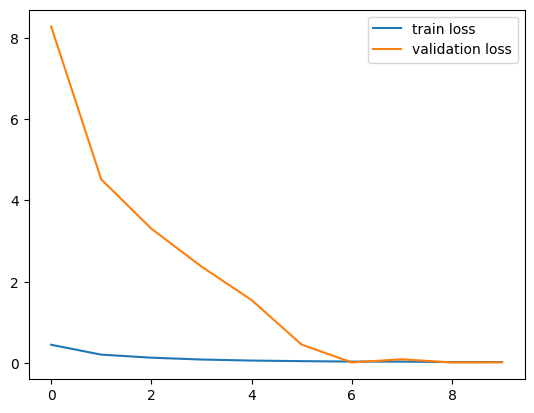

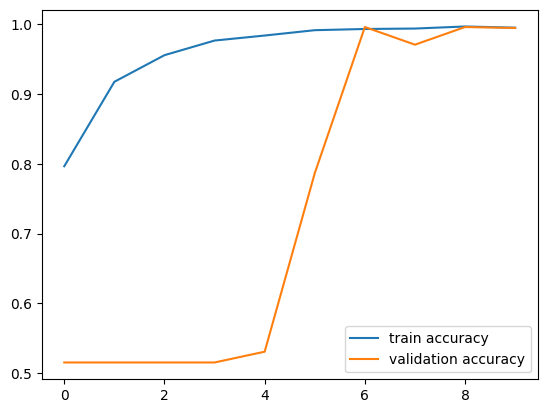

In [42]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [45]:
import pickle

# ... (your existing code) ...

# After training the model (after model.fit)
with open('Arsenic_Skin_Detection.pkl', 'wb') as file:
  pickle.dump(model, file)

print("Model saved as Face_Mask_Detection_model.pkl")

Model saved as Face_Mask_Detection_model.pkl
